In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_data.csv")
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  bhk  
0  Coomee        1056   2.0      1.0   39.07  2.0  
1  Theanmp       2600   5.0      3.0  120.00  4.0  
2      NaN       1440   2.0      3.0   62.00  3.0  
3  Soiewre       1521   3.0      1.0   95.00  3.0  
4      NaN       1200   2.0      1.0   51.00  2.0

In [3]:
df1.shape

(13320, 10)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'bhk'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 6)

In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
bhk           16
dtype: int64

In [8]:
df2.shape

(13320, 6)

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [10]:
df3.shape


(13246, 6)

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\aryan\AppData\Local\Temp\ipykernel_8728\2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
2+3

5

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [16]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4

In [17]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [18]:
(2100+2850)/2

2475.0

In [19]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [20]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [21]:
df5.to_csv("bhp.csv",index=False)

In [27]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [27]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Bengaluru_House_Data.csv')

# Drop columns that are not useful
df = df.drop(['area_type', 'society', 'availability', 'balcony'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Create 'bhk' column
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

# Convert total_sqft to numeric
def convert_sqft_to_num(x):
    try:
        return float(x)
    except:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

# Drop rows where total_sqft couldn't be converted
df = df.dropna()

# Calculate price per square foot
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']


In [28]:
# Get location counts
location_stats = df['location'].value_counts()

# Print sum of values
print("Total records from location_stats:", location_stats.values.sum())


Total records from location_stats: 13200


In [29]:
len(location_stats)

1298

In [30]:
len(location_stats[location_stats<=10])

1058

In [31]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Ganga Nagar                  10
Nagappa Reddy Layout         10
Naganathapura                10
Sadashiva Nagar              10
Basapura                     10
                             ..
Indiranagar HAL 2nd Stage     1
Maruthi HBCS Layout           1
K R C kothanur                1
1Channasandra                 1
Abshot Layout                 1
Name: count, Length: 1058, dtype: int64

In [32]:
len(df5.location.unique())

1298

In [33]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [34]:
df5.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

In [35]:
df5[df5.total_sqft/df5.bhk<300].head()

location       size  total_sqft  bath  price  bhk  price_per_sqft
9           other  6 Bedroom      1020.0   6.0  370.0    6    36274.509804
45     HSR Layout  8 Bedroom       600.0   9.0  200.0    8    33333.333333
58  Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6    10660.980810
68          other  8 Bedroom      1350.0   7.0   85.0    8     6296.296296
70          other  3 Bedroom       500.0   3.0  100.0    3    20000.000000

In [36]:
df5.shape

(13200, 7)

In [37]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [38]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10245, 7)

In [40]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
import matplotlib.pyplot as plt 

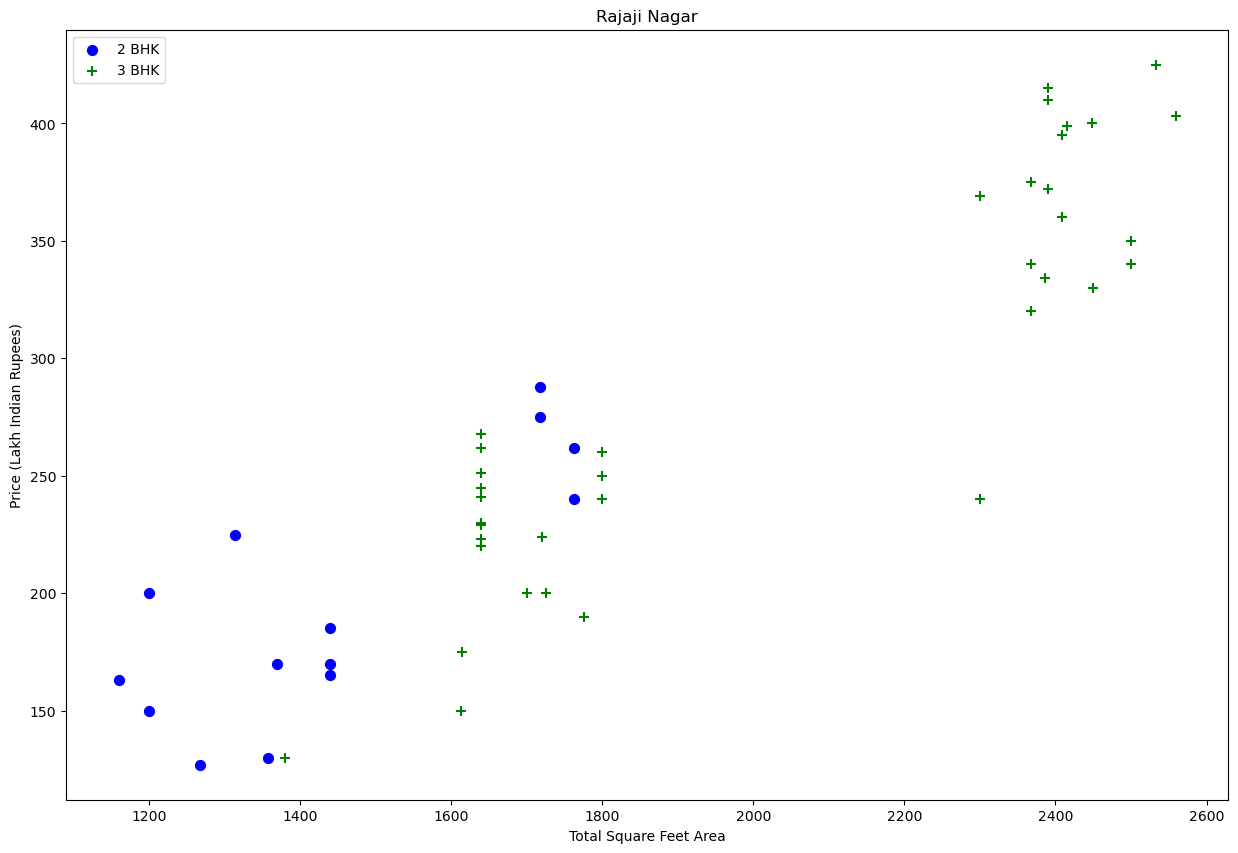

In [42]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()
    
plot_scatter_chart(df7,"Rajaji Nagar")

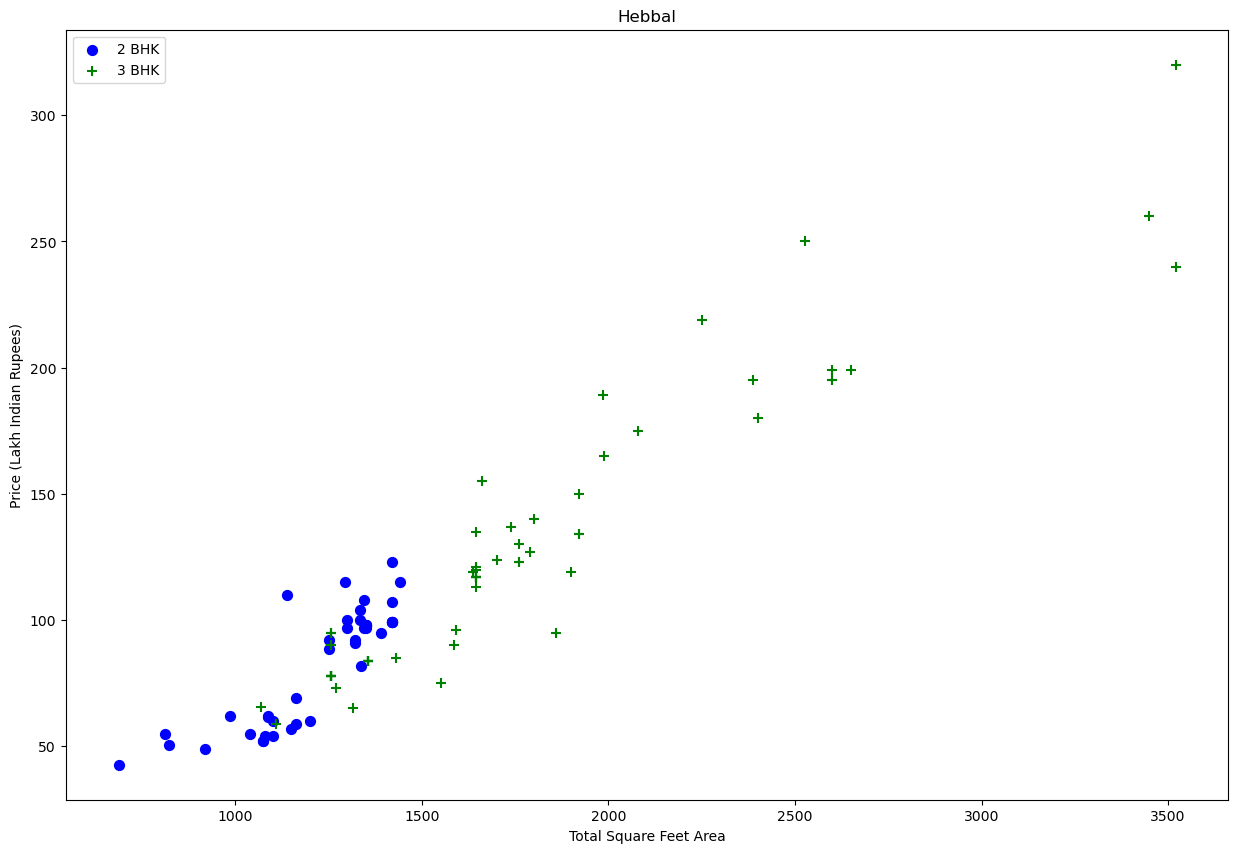

In [43]:
plot_scatter_chart(df7,"Hebbal")

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7331, 7)

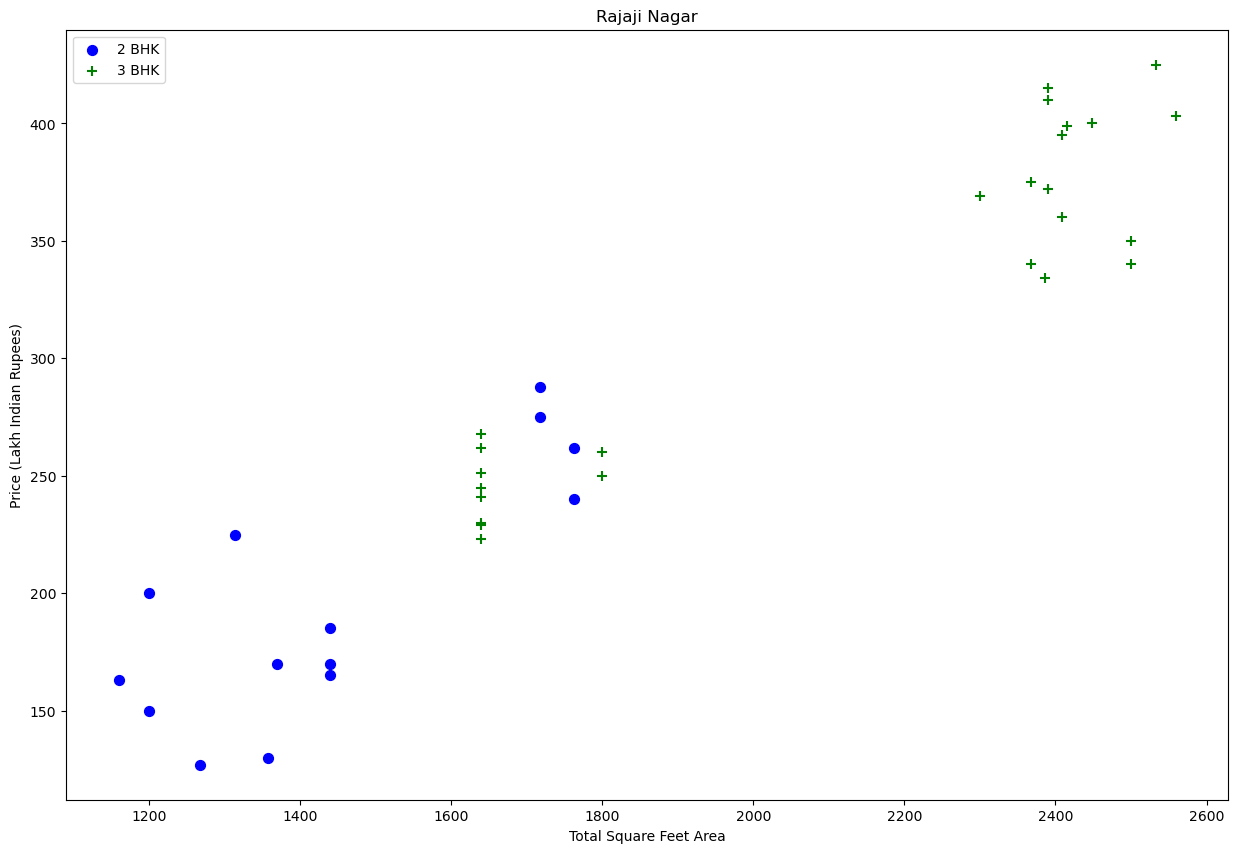

In [45]:
plot_scatter_chart(df8,"Rajaji Nagar")

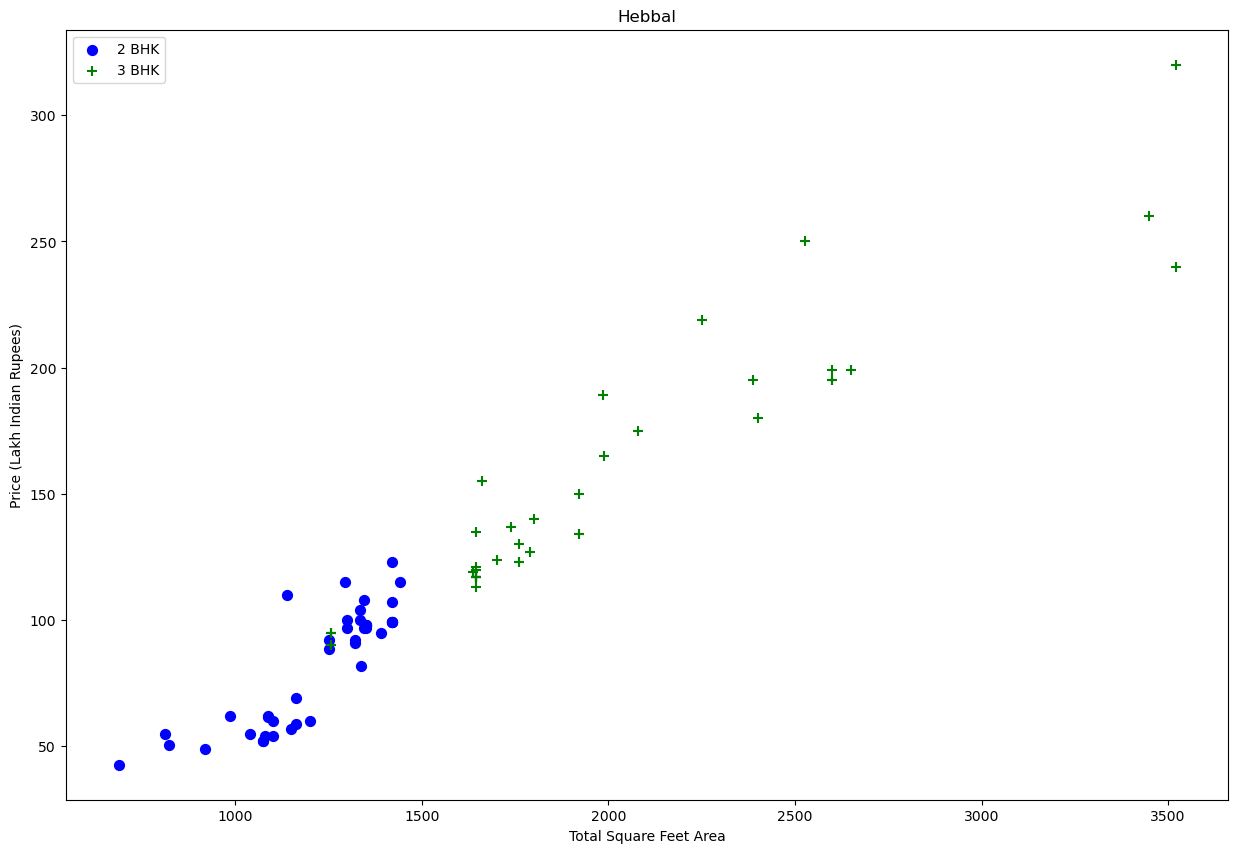

In [46]:
plot_scatter_chart(df8,"Hebbal")

In [47]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

In [48]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [49]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Text(199.22222222222223, 0.5, 'Count')

In [50]:
df8[df8.bath>10]

location    size  total_sqft  bath  price  bhk  price_per_sqft
5271  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8478           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8567           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9307           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9639           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

In [51]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
1637  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5232     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6702    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8402          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [52]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7253, 7)

In [53]:
df9.head(2)

location       size  total_sqft  bath  price  bhk  \
1   Devarachikkanahalli      2 BHK      1250.0   2.0   40.0    2   
2   Devarachikkanahalli  2 Bedroom      1200.0   2.0   83.0    2   

   price_per_sqft  
1     3200.000000  
2     6916.666667

In [54]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

location  total_sqft  bath  price  bhk
1   Devarachikkanahalli      1250.0   2.0   40.0    2
2   Devarachikkanahalli      1200.0   2.0   83.0    2
3   Devarachikkanahalli      1170.0   2.0   40.0    2

In [55]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

Devarachikkanahalli  1st Block Jayanagar  1st Phase JP Nagar  \
1                  True                False               False   
2                  True                False               False   
3                  True                False               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   

   5th Phase JP Nagar  6th Phase JP Nagar  7th Phase JP Nagar  \
1               False               False               False   
2               False               False               False   
3               False               False               False   

   8th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
1               False  ...                 False               False   
2               False  ...                 False               False   
3               False  ...                 False               False   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
1        False       False           False      False               False   
2        False       False           False      False               False   
3        False       False           False      False               False   

   Yelenahalli  Yeshwanthpur  other  
1        False         False  False  
2        False         False  False  
3        False         False  False  

[3 rows x 241 columns]

In [56]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

location  total_sqft  bath  price  bhk   Devarachikkanahalli  \
1   Devarachikkanahalli      1250.0   2.0   40.0    2                  True   
2   Devarachikkanahalli      1200.0   2.0   83.0    2                  True   
3   Devarachikkanahalli      1170.0   2.0   40.0    2                  True   
4   Devarachikkanahalli      1425.0   2.0   65.0    3                  True   
5   Devarachikkanahalli       947.0   2.0   43.0    2                  True   

   1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
1                False               False                      False   
2                False               False                      False   
3                False               False                      False   
4                False               False                      False   
5                False               False                      False   

   2nd Stage Nagarbhavi  ...  Vijayanagar  Vishveshwarya Layout  \
1                 False  ...        False                 False   
2                 False  ...        False                 False   
3                 False  ...        False                 False   
4                 False  ...        False                 False   
5                 False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
1               False        False       False           False      False   
2               False        False       False           False      False   
3               False        False       False           False      False   
4               False        False       False           False      False   
5               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
1               False        False         False  
2               False        False         False  
3               False        False         False  
4               False        False         False  
5               False        False         False  

[5 rows x 245 columns]

In [57]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

total_sqft  bath  price  bhk   Devarachikkanahalli  1st Block Jayanagar  \
1      1250.0   2.0   40.0    2                  True                False   
2      1200.0   2.0   83.0    2                  True                False   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
1               False                      False                 False   
2               False                      False                 False   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
1                 False  ...        False                 False   
2                 False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
1               False        False       False           False      False   
2               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
1               False        False         False  
2               False        False         False  

[2 rows x 244 columns]

In [58]:
df12.shape

(7253, 244)

In [59]:
X = df12.drop(['price'],axis='columns')
X.head(3)

total_sqft  bath  bhk   Devarachikkanahalli  1st Block Jayanagar  \
1      1250.0   2.0    2                  True                False   
2      1200.0   2.0    2                  True                False   
3      1170.0   2.0    2                  True                False   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
1               False                      False                 False   
2               False                      False                 False   
3               False                      False                 False   

   5th Block Hbr Layout  5th Phase JP Nagar  ...  Vijayanagar  \
1                 False               False  ...        False   
2                 False               False  ...        False   
3                 False               False  ...        False   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
1                 False               False        False       False   
2                 False               False        False       False   
3                 False               False        False       False   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
1           False      False               False        False         False  
2           False      False               False        False         False  
3           False      False               False        False         False  

[3 rows x 243 columns]

In [60]:
X.shape

(7253, 243)

In [61]:
y = df12.price
y.head(3)

1    40.0
2    83.0
3    40.0
Name: price, dtype: float64

In [62]:
len(y)

7253

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [64]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7780866051088406

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84014922, 0.78873287, 0.86373278, 0.86871995, 0.88094502])

In [66]:
    !pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [68]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Check the version of scikit-learn
import sklearn
if sklearn.__version__ < '0.24':
    linear_regression_params = {'normalize': [True, False]}
else:
    linear_regression_params = {}

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': linear_regression_params  # Using the conditional params
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage
# X, y should be your feature matrix and target vector
# find_best_model_using_gridsearchcv(X, y)


In [69]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [70]:
    import sklearn

In [71]:
    print(sklearn.__version__)


1.5.1


In [72]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Check the version of scikit-learn
import sklearn
if sklearn.__version__ < '0.24':
    linear_regression_params = {'normalize': [True, False]}
else:
    linear_regression_params = {}

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': linear_regression_params  # Using the conditional params
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])





In [73]:
find_best_model_using_gridsearchcv(X,y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packages\

model  best_score  \
0  linear_regression    0.848456   
1              lasso    0.709015   
2      decision_tree    0.757727   

                                         best_params  
0                                                 {}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}

In [74]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [75]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.11865848182059

In [76]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.90092227892157

In [77]:
predict_price('Indira Nagar',1000, 2, 2)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


192.43062362610266

In [78]:
predict_price('Indira Nagar',1000, 3, 3)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.2128874232036

In [79]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [81]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [87]:
import json

# Save all column names used during training (lowercased for consistency)
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

# Write to JSON file
with open("columns.json", "w") as f:
    json.dump(columns, f)

print("✅ columns.json file saved!")


✅ columns.json file saved!


In [88]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)